In [1]:
%matplotlib inline

In [2]:
from sklearn.datasets import load_breast_cancer
breast = load_breast_cancer()
import pandas as pd
X = pd.DataFrame(breast["data"], columns = breast["feature_names"])
y = pd.Series(breast["target"])

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.33, random_state=42)

In [4]:
from sklearn.svm import LinearSVC

In [5]:
from sklearn.model_selection import cross_val_score

In [6]:
best_score = 0
parameters = {}

In [7]:
for C in [1e-4, 1e-3, 1e-2, 1e-1, 0.5, 1., 5., 10., 15., 20., 25.]:
    for tol in [1e-5, 1e-4, 1e-3, 1e-2, 1e-1]:
        for dual in [True, False]:
            for penalty in ["l1", "l2"]:
                for loss in ["hinge", "squared_hinge"]:
                    clf = LinearSVC(C = C, tol = tol, dual = dual, penalty = penalty, loss = loss)
                    try:
                        scores = cross_val_score(clf, X_train, y_train, cv = 5)
                    except ValueError as e:
                        #print(e)
                        continue
                    if scores.mean() > best_score:
                        parameters["C"] = C
                        parameters["tol"] = tol
                        parameters["dual"] = dual
                        parameters["penalty"] = penalty
                        parameters["loss"] = loss
                        best_score = scores.mean()
                        print("Accuracy: {}".format(scores.mean()))
                        print("C: {}, tol: {}, dual: {}, penalty: {}, loss: {}".format(C, tol, dual, penalty, loss))

Accuracy: 0.9003075871496924
C: 0.0001, tol: 1e-05, dual: True, penalty: l2, loss: hinge
Accuracy: 0.9055365686944634
C: 0.0001, tol: 1e-05, dual: True, penalty: l2, loss: squared_hinge
Accuracy: 0.9081681476418317
C: 0.0001, tol: 0.001, dual: True, penalty: l2, loss: squared_hinge
Accuracy: 0.9107997265892003
C: 0.001, tol: 1e-05, dual: True, penalty: l2, loss: squared_hinge
Accuracy: 0.9133971291866029
C: 0.001, tol: 0.001, dual: False, penalty: l2, loss: squared_hinge
Accuracy: 0.9134313055365686
C: 0.001, tol: 0.01, dual: True, penalty: l2, loss: squared_hinge
Accuracy: 0.9134654818865346
C: 0.001, tol: 0.1, dual: True, penalty: l2, loss: squared_hinge
Accuracy: 0.9291182501708818
C: 0.01, tol: 1e-05, dual: False, penalty: l2, loss: squared_hinge
Accuracy: 0.9317840054682159
C: 0.1, tol: 1e-05, dual: False, penalty: l1, loss: squared_hinge
Accuracy: 0.9396787423103212
C: 0.1, tol: 1e-05, dual: False, penalty: l2, loss: squared_hinge
Accuracy: 0.9474709501025289
C: 0.5, tol: 1e-05, 

In [8]:
clf = LinearSVC(C = parameters["C"], tol = parameters["tol"], dual = parameters["dual"], penalty = parameters["penalty"], 
                loss = parameters["loss"])


In [9]:
clf.fit(X_train, y_train)

LinearSVC(C=20.0, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l1', random_state=None, tol=0.01,
     verbose=0)

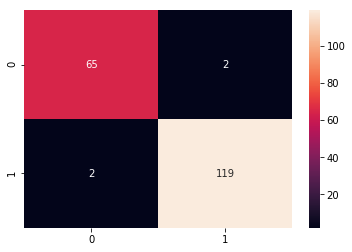

In [10]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(y_true = y_test, y_pred = clf.predict(X_test)), annot = True, fmt="d")